In [123]:
# importing all necessary modules

import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
import scienceplots
%matplotlib inline

plt.style.use(['science', 'notebook','grid'])
plt.style.use(['science', 'notebook','grid', 'dark_background'])
plt.style.use(['science', 'notebook','grid'])

In [124]:
# defing our function
# if you wish to change the function do it here

x = smp.symbols('x')
sigma = 0.75
amplitude = 2
y = amplitude*smp.exp(-(x**2)/sigma**2)

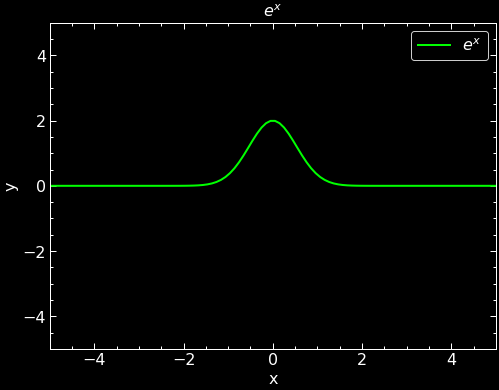

In [125]:
# defining a function that plots the above defined sympy expression as a matplotlib plot

def plot_smp_func(x, y, title, color = '#00ff00', xlim = (-5, 5), ylim = (-5, 5), xlabel = 'x', ylabel = 'y', grid = True, legend = True):
    
    y_f = smp.lambdify(x, y)    
    x_f = np.linspace(xlim[0], xlim[1], 100)
    
    plt.plot(x_f, y_f(x_f), color = color, label = title)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if grid:
        plt.grid()
    if legend:
        plt.legend()
        
    plt.show()
    
plot_smp_func(x, y, '$e^x$')

-7.11111111111111*x*exp(-1.77777777777778*x**2)


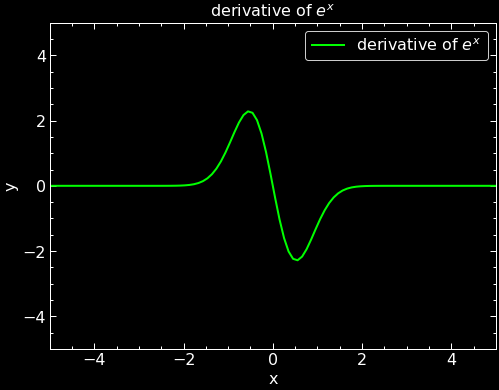

In [126]:
# defining a function that returns the nth order derivative of any* mathematical function

def derivative(func, x, n):
    y_n_prime = [func]
    while n > 0:
        y_n_prime.append(smp.diff(y_n_prime[-1], x))
        n -= 1
    return y_n_prime

n = 1
y_n_prime = derivative(y, x, n)
print(y_n_prime[n])
plot_smp_func(x, y_n_prime[n], 'derivative of $e^x$')

In [127]:
# defining a function that returns the taylor series of any* mathematical function

def taylor_app(i, func, x, a):
    series = [func]
    n = 0
    
    while i >= 0:
        f_n = derivative(func, x, n)[n]
        f_n_a = f_n.subs(x, a)
        
        ith_approximation = (f_n_a/smp.factorial(n))*(x-a)**n
        series.append(ith_approximation)
        i -= 1
        n += 1
            
    return sum(series[1:])
    
taylor_app(5, y, x, 0)

3.16049382716049*x**4 - 3.55555555555556*x**2 + 2

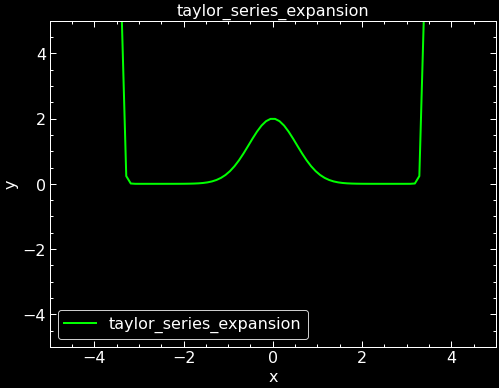

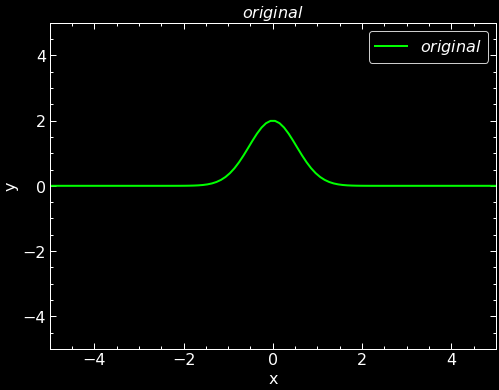

In [132]:
plot_smp_func(x, taylor_app(100, y, x, 0), 'taylor_series_expansion')
plot_smp_func(x, y, '$original$')